### DT model

In [1]:
import pandas as pd

# load dataset 
df = pd.read_csv('cleaned_loan.csv')
df.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_Aadhar,proof_Driving,proof_PAN,proof_Passport,proof_VoterID,loan_amount_log,asset_cost_log,loan_to_value_ratio_log,debt_load_ratio_log
0,27,1,504264,820920,2,2,0,0,1,0,0,0,0,13.130857,13.618182,0.964215,0.666667
1,48,1,728556,831444,6,2,0,0,1,0,0,0,0,13.498821,13.630920,0.990309,0.285714
2,30,2,642936,826092,0,0,0,1,0,0,0,0,1,13.373802,13.624463,0.981602,0.000000
3,28,1,746556,930924,0,0,0,0,1,0,0,0,0,13.523227,13.743934,0.983942,0.000000
4,29,1,1139880,1902000,0,0,0,0,1,0,0,0,0,13.946434,14.458417,0.964589,0.000000


In [2]:
# assign features
X = df[['age', 'education', 'last_delinq_none', 'loan_to_value_ratio_log', 'debt_load_ratio_log']]
y = df['loan_default']

In [3]:
from sklearn.model_selection import train_test_split

# split into training and validation sets (90 10)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['age', 'loan_to_value_ratio_log', 'debt_load_ratio_log']

# Scale the selected columns in the training data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Scale the same columns in the validation data
X_valid[columns_to_scale] = scaler.transform(X_valid[columns_to_scale])

In [5]:
from sklearn.tree import DecisionTreeClassifier

# DT baseline model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# predict valid 
y_pred = dt_model.predict(X_valid)
print("DT Based Model:")

# training accuracy
trainAccuracy = dt_model.score(X_train, y_train)
print("Training Accuracy:", trainAccuracy)

# valid accuracy
validAccuracy = accuracy_score(y_valid, y_pred)
print("Validation Accuracy:", validAccuracy)

# precison recall f1score
print(classification_report(y_valid, y_pred))

DT Based Model:
Training Accuracy: 0.9998354992597467
Validation Accuracy: 0.5369822485207101
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       402
           1       0.43      0.43      0.43       274

    accuracy                           0.54       676
   macro avg       0.52      0.52      0.52       676
weighted avg       0.54      0.54      0.54       676



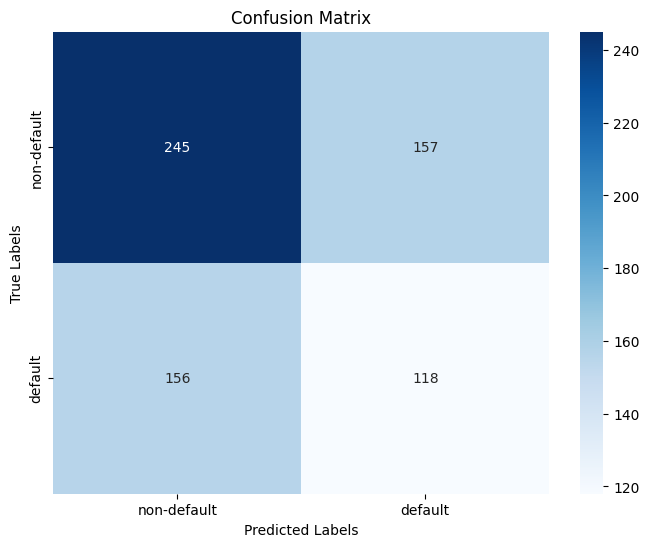

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Define custom labels
custom_labels = ['non-default', 'default']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# DT classifier             
dt_model = DecisionTreeClassifier()

# hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30, 50],  
    'max_features': [None, 'auto', 'sqrt', 'log2'],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 6],  
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'splitter': ['best', 'random']  
}

# perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# make predictions
best_model = grid_search.best_estimator_
predictions_test = best_model.predict(X_valid)

# calculate accuracy 
best_model_train_score = best_model.score(X_train, y_train)
best_model_test_score = best_model.score(X_valid, y_valid)

print()
print("Best Model:")
print("Training Score: {}\nTest Score: {}".format(best_model_train_score, best_model_test_score))

# classification report
report = classification_report(y_valid, predictions_test, output_dict=True)

print("\nClassification Report:")
print(classification_report(y_valid, predictions_test))

Best Hyperparameters: {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 10, 'splitter': 'random'}
Best Cross-Validation Accuracy: 0.5994437675980074

Best Model:
Training Score: 0.6071722322750452
Test Score: 0.599112426035503

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.95      0.74       402
           1       0.53      0.09      0.15       274

    accuracy                           0.60       676
   macro avg       0.57      0.52      0.44       676
weighted avg       0.58      0.60      0.50       676



C:\Users\Joe Chok\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Joe Chok\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Joe Chok\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Joe Chok\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_

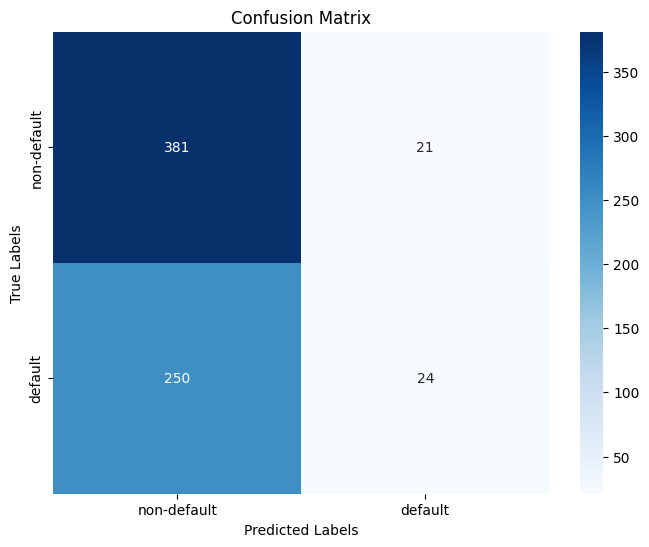

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_valid, predictions_test)

# Define custom labels
custom_labels = ['non-default', 'default']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()